## Naive Bayes 

<img src = './Imagenes/Teorema de Bayes v.png' height = '200'>


Donde:

* P(A): es la probabilidad de que la hipótesis A sea cierta (independientemente de los datos). Esto se conoce como la probabilidad previa de A.

* P(B): probabilidad de los datos (independientemente de la hipótesis). Esto se conoce como probabilidad previa.

* P(A|B): es la probabilidad de la hipótesis A dada los datos B. Esto se conoce como la probabilidad posterior.

* P(B|A): es la probabilidad de los datos B dado que la hipótesis A era cierta. Esto se conoce como probabilidad posterior.

In [3]:
## Importamos librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [11]:
df = pd.read_csv('./Datasets/titanic_clean.csv')
df.head()

,Unnamed: 0,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,0,3,0,1,0,0,0
1,1,1,1,1,1,0,3,1
2,2,1,3,1,0,0,0,0
3,3,1,1,1,1,0,3,0
4,4,0,3,0,0,0,0,0


In [12]:
## Borramos la primer "Unnamed: 0" y la columna de "Survived"
X_data = df.drop(['Unnamed: 0', 'Survived'], axis = 1)
X_data.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,0,1,0,0,0
1,1,1,1,0,3,1
2,3,1,0,0,0,0
3,1,1,1,0,3,0
4,3,0,0,0,0,0


In [13]:
y_survived = df['Survived']
y_survived.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_survived, test_size = 0.3, random_state = 42)

In [15]:
## Instanciamos nuestro modelo 
gnbModel = GaussianNB()
gnbModel.fit(X_train, y_train)

GaussianNB()

In [16]:
y_predict = gnbModel.predict(X_test)

In [17]:
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[118  39]
 [ 14  97]]


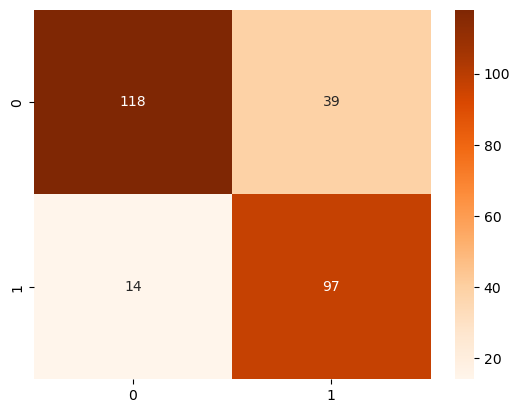

In [19]:
sns.heatmap(cm, annot = True, fmt = 'g', cmap = 'Oranges')
plt.show()

In [20]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.75      0.82       157
           1       0.71      0.87      0.79       111

    accuracy                           0.80       268
   macro avg       0.80      0.81      0.80       268
weighted avg       0.82      0.80      0.80       268

